In [1]:
import pandas as pd

csv_fn = "TiAlNb_1_8.csv"
df = pd.read_csv(csv_fn)
df.head()

structure_id conf_symbol  mixing_energy_pa   Ti   Al   Nb
0  ICET-Training-No-00001          Ti          0.000000  1.0  0.0  0.0
1  ICET-Training-No-00002          Al          0.000000  0.0  1.0  0.0
2  ICET-Training-No-00003          Nb          0.000000  0.0  0.0  1.0
3  ICET-Training-No-00006        AlTi         -0.507799  0.5  0.5  0.0
4  ICET-Training-No-00007        NbTi         -0.021287  0.5  0.0  0.5

In [2]:
df.tail()

structure_id conf_symbol  mixing_energy_pa     Ti     Al  \
1104  ICET-Training-No-0392792   Al3Nb3Ti2         -0.241324  0.250  0.375   
1105  ICET-Training-No-0399842    Al3Nb4Ti         -0.188394  0.125  0.375   
1106  ICET-Training-No-0411729   Al2Nb4Ti2         -0.215340  0.250  0.250   
1107  ICET-Training-No-0422339   Al3Nb3Ti2         -0.184759  0.250  0.375   
1108  ICET-Training-No-0423859    Al3Nb4Ti         -0.111821  0.125  0.375   

         Nb  
1104  0.375  
1105  0.500  
1106  0.500  
1107  0.375  
1108  0.500

In [3]:
comp_df = df["conf_symbol"]
energy_df = df["mixing_energy_pa"]

In [4]:
from pymatgen.core.composition import Composition

Composition(comp_df[1000])

Composition('Al2 Nb2 Ti3')

无法直接使用 `pymatgen.entries` 中的 `Entry` 类初始化，会报错，`energy` 参数为 `ABC` 抽象类型（Doc 有提及），而是用 `pymatgen.analysis.phase_diagram` 中的 PDEntry 类初始化

In [5]:
from pymatgen.entries import Entry

Entry(Composition(comp_df[1000]), energy_df[1000])

TypeError: Can't instantiate abstract class Entry with abstract method energy

In [6]:
entry = Entry("Al2 Nb2 Ti3", 0.0)

TypeError: Can't instantiate abstract class Entry with abstract method energy

In [7]:
from pymatgen.analysis.phase_diagram import PDEntry


entry = PDEntry("Al2 Nb2 Ti3", 0.0)
entry

PDEntry : Al2 Nb2 Ti3 with energy = 0.0000

In [8]:
entries = []
for i in range(df.shape[0]):
    comp = Composition(comp_df[i])
    energy = energy_df[i]
    entry = PDEntry(composition=comp, energy=energy)
    entries.append(entry)

In [9]:
entries[:10]

[PDEntry : Ti1 with energy = 0.0000,
 PDEntry : Al1 with energy = 0.0000,
 PDEntry : Nb1 with energy = 0.0000,
 PDEntry : Al1 Ti1 with energy = -0.5078,
 PDEntry : Nb1 Ti1 with energy = -0.0213,
 PDEntry : Al1 Nb1 with energy = -0.3445,
 PDEntry : Al1 Ti1 with energy = -0.3669,
 PDEntry : Nb1 Ti1 with energy = 0.0148,
 PDEntry : Al1 Nb1 with energy = -0.0831,
 PDEntry : Al1 Ti2 with energy = -0.3752]

In [10]:
from pymatgen.analysis.phase_diagram import PhaseDiagram

phasediagram = PhaseDiagram(entries)
phasediagram

Ti-Nb-Al phase diagram
9 stable phases: 
NbAl, TiAl, Al, TiNb, Ti4Nb, Ti5Nb, Nb, TiNb2, Ti

In [11]:
# 默认 backend 是 plotly，在 GitHub repo 中无法显示
phasediagram.get_plot()

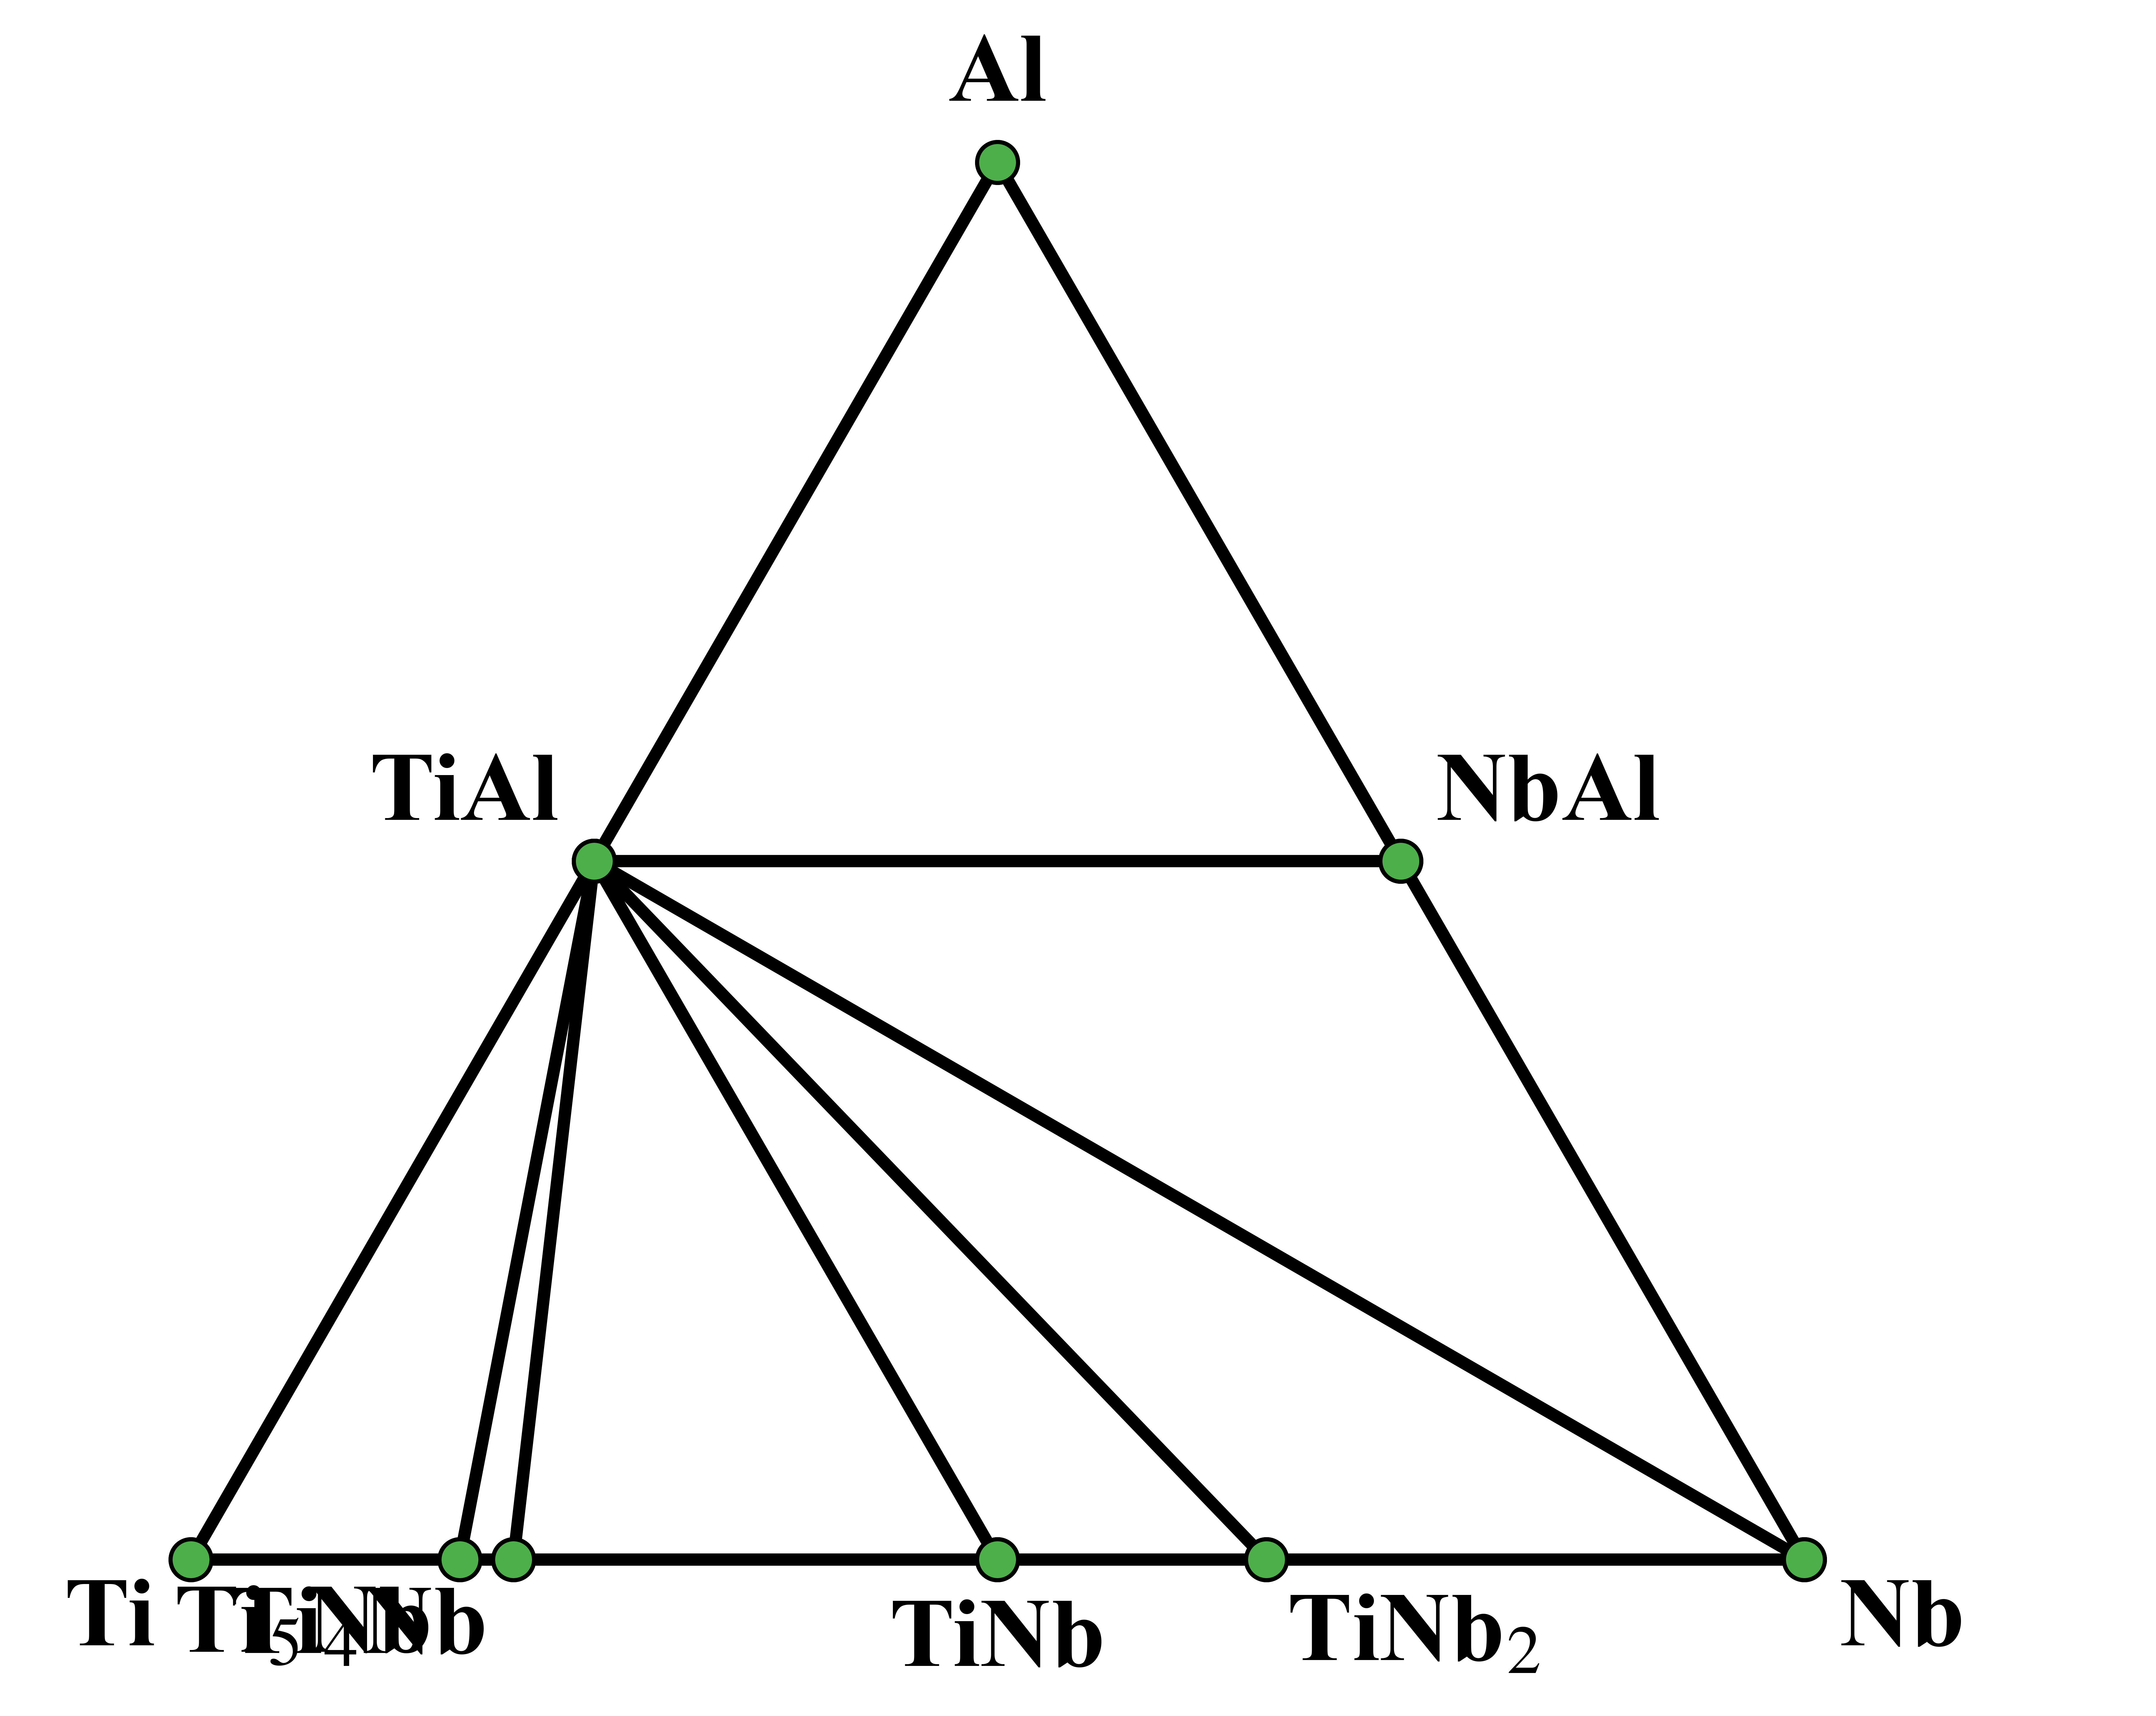

In [16]:
from spt.plot_params import set_roman_plot_params

set_roman_plot_params()

# TO DO: text 字体大小无法修改 导致有重叠
ax = phasediagram.get_plot(backend="matplotlib", show_unstable=False)

In [13]:
ax.texts

<Axes.ArtistList of 9 texts>